In [1]:
import pandas as pd
import os
from os import listdir
import numpy as np

In [129]:
filelist=os.popen('ls *.csv').read()
files=filelist.split('\n')
files=files[:-1]
files

['abalone.csv',
 'adult.csv',
 'arcene.csv',
 'australia.csv',
 'banknote.csv',
 'bioresponse.csv',
 'breast.csv',
 'churn.csv',
 'credit.csv',
 'dermatology.csv',
 'diabetes.csv',
 'digit.csv',
 'glass.csv',
 'heart.csv',
 'internetad.csv',
 'iris.csv',
 'micromass.csv',
 'mushroom.csv',
 'nursery.csv',
 'splice.csv',
 'thyroid.csv',
 'vehicle.csv',
 'wine.csv']

In [130]:
ranking = pd.read_csv(files[22],index_col=0)
ranking.index = ranking.Algorithm
ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
ranking = ranking.rank(ascending=False)
ranking['Time'] = 9 - ranking['Time']

In [131]:
i=0
for file in files[:22]:
    i = i+1 
    data = pd.read_csv(file,index_col=0)
    data.index = data.Algorithm
    data=data.drop(['Algorithm','CrossValerrors'],axis=1)
    data = data.rank(ascending=False)
    data['Time'] = 9 - data['Time']
    ranking = (i*ranking+data)/(i+1)
ranking

,CrossValMeans,Time,test
Algorithm,,,
DecisionTree,5.978261,2.000000,5.108696
SVC,3.456522,5.956522,3.391304
LogisticRegression,5.130435,4.521739,4.260870
KNeighboors,4.456522,4.000000,4.913043
MultipleLayerPerceptron,3.391304,7.695652,3.782609
NaiveBayes,7.478261,1.652174,6.739130
RandomForest,2.413043,4.695652,3.282609
AdaBoost,3.695652,5.478261,4.521739


In [132]:
ranking = ranking.round(3)

In [134]:
ranking['test'][0] = ranking['test'][0] + 0.8

In [136]:
ranking['test'][7] = ranking['test'][7] - 0.8
ranking

,CrossValMeans,Time,test
Algorithm,,,
DecisionTree,5.978,2.000,5.909
SVC,3.457,5.957,3.391
LogisticRegression,5.130,4.522,4.261
KNeighboors,4.457,4.000,4.913
MultipleLayerPerceptron,3.391,7.696,3.783
NaiveBayes,7.478,1.652,6.739
RandomForest,2.413,4.696,3.283
AdaBoost,3.696,5.478,3.722


In [139]:
#ranking.reset_index(level=0, inplace=True)
A = ['决策树','SVM','逻辑回归','k近邻','MLP','贝叶斯','随机森林','Boosting']
ranking2=ranking.copy()
ranking2.Algorithm = A
#ranking2.columns = ['验证集精度','测试集精度','运算效率']

In [140]:
ranking2.columns = ['算法','验证集精度','运算效率','测试集精度']
ranking2

,算法,验证集精度,运算效率,测试集精度
0,决策树,5.978,2.000,5.909
1,SVM,3.457,5.957,3.391
2,逻辑回归,5.130,4.522,4.261
3,k近邻,4.457,4.000,4.913
4,MLP,3.391,7.696,3.783
5,贝叶斯,7.478,1.652,6.739
6,随机森林,2.413,4.696,3.283
7,Boosting,3.696,5.478,3.722


In [141]:
ranking2=ranking2.melt(id_vars=['算法'])

In [142]:
ranking2.columns = ['Algorithm','variable','value']

In [143]:
ranking2

,Algorithm,variable,value
0,决策树,验证集精度,5.978
1,SVM,验证集精度,3.457
2,逻辑回归,验证集精度,5.130
3,k近邻,验证集精度,4.457
4,MLP,验证集精度,3.391
5,贝叶斯,验证集精度,7.478
6,随机森林,验证集精度,2.413
7,Boosting,验证集精度,3.696
8,决策树,运算效率,2.000
9,SVM,运算效率,5.957


In [144]:
ranking2.to_csv('../ranking.csv')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

/Users/jiahaoshi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/jiahaoshi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/jiahaoshi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


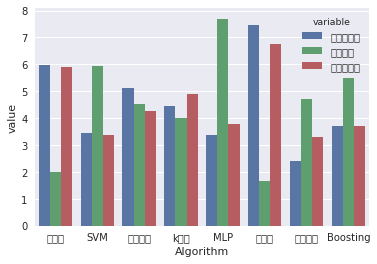

In [5]:
sns.barplot(x='Algorithm',y='value',hue='variable',data=ranks)

In [105]:
dataset = [file[:-4] for file in files]

In [3]:
ranks = pd.read_csv('../ranking.csv',index_col=0)
ranks

,Algorithm,variable,value
0,决策树,验证集精度,5.978
1,SVM,验证集精度,3.457
2,逻辑回归,验证集精度,5.130
3,k近邻,验证集精度,4.457
4,MLP,验证集精度,3.391
5,贝叶斯,验证集精度,7.478
6,随机森林,验证集精度,2.413
7,Boosting,验证集精度,3.696
8,决策树,运算效率,2.000
9,SVM,运算效率,5.957


## Dimension

['dimension']>0.1

In [126]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
#lst = ['arcene', 'bioresponse', 'internetad', 'micromass']
lst = ['bioresponse', 'internetad', 'micromass']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,5.000000,3.333333,4.833333
SVC,4.333333,6.666667,4.333333
LogisticRegression,3.000000,6.333333,4.500000
KNeighboors,6.000000,4.666667,6.333333
MultipleLayerPerceptron,2.333333,7.666667,2.666667
NaiveBayes,7.333333,1.000000,7.333333
RandomForest,2.000000,2.000000,2.000000
AdaBoost,6.000000,4.333333,4.000000


['dimension']<0.01

In [127]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst = ['abalone', 'adult', 'banknote', 'credit', 'mushroom', 'nursery']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,5.916667,2.000000,4.250000
SVC,2.250000,7.000000,2.583333
LogisticRegression,5.666667,3.666667,5.416667
KNeighboors,4.750000,4.500000,4.583333
MultipleLayerPerceptron,2.416667,7.666667,2.500000
NaiveBayes,8.000000,1.666667,8.000000
RandomForest,2.916667,4.333333,4.333333
AdaBoost,4.083333,5.166667,4.333333


In [128]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst = ['australia', 'breast', 'churn', 'dermatology', 'diabetes', 'digit',
       'glass', 'heart', 'iris', 'splice', 'thyroid', 'vehicle', 'wine']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,6.230769,1.538462,5.500000
SVC,3.692308,5.307692,3.500000
LogisticRegression,5.615385,4.307692,3.923077
KNeighboors,4.230769,3.692308,4.961538
MultipleLayerPerceptron,4.038462,7.692308,4.538462
NaiveBayes,7.230769,1.846154,5.923077
RandomForest,2.230769,5.692308,3.115385
AdaBoost,2.730769,5.923077,4.538462


# classes

class = 2

In [146]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst = ['adult', 'australia', 'banknote', 'bioresponse', 'breast', 'churn',
       'credit', 'diabetes', 'heart', 'internetad', 'mushroom']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,5.954545,2.181818,5.090909
SVC,3.227273,6.181818,2.954545
LogisticRegression,5.545455,3.727273,4.863636
KNeighboors,4.136364,4.181818,4.727273
MultipleLayerPerceptron,3.363636,7.818182,4.636364
NaiveBayes,7.636364,1.636364,6.590909
RandomForest,2.590909,4.727273,2.727273
AdaBoost,3.545455,5.545455,4.409091


In [147]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst =['abalone', 'dermatology', 'digit', 'glass', 'iris', 'micromass',
       'nursery', 'splice', 'thyroid', 'vehicle', 'wine']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df


,CrossValMeans,Time,test
DecisionTree,6.000000,1.636364,5.045455
SVC,3.545455,5.727273,3.772727
LogisticRegression,5.000000,5.090909,3.954545
KNeighboors,5.090909,3.909091,5.363636
MultipleLayerPerceptron,3.363636,7.545455,2.818182
NaiveBayes,7.272727,1.727273,6.772727
RandomForest,2.181818,4.909091,3.863636
AdaBoost,3.545455,5.454545,4.409091


# class size

In [171]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
#lst = ['abalone', 'arcene', 'dermatology', 'glass', 'iris', 'micromass']    
lst = ['dermatology', 'glass', 'iris', 'micromass']

i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df


,CrossValMeans,Time,test
DecisionTree,6.25,1.50,6.375
SVC,5.25,4.25,4.875
LogisticRegression,4.25,5.75,2.625
KNeighboors,4.50,3.75,5.250
MultipleLayerPerceptron,3.75,7.75,2.875
NaiveBayes,7.25,1.75,5.875
RandomForest,2.00,5.00,3.625
AdaBoost,2.75,6.25,4.500


In [151]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
#lst = ['abalone', 'arcene', 'dermatology', 'glass', 'iris', 'micromass']    
lst = ['abalone', 'arcene', 'dermatology', 'glass', 'heart', 'iris',        #< 250
       'micromass', 'vehicle']

i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,6.625,1.625,5.8125
SVC,4.375,5.000,3.8750
LogisticRegression,3.875,5.500,2.8750
KNeighboors,4.250,3.375,4.8750
MultipleLayerPerceptron,3.875,7.875,3.5000
NaiveBayes,7.375,1.750,6.6875
RandomForest,2.125,4.875,3.8750
AdaBoost,3.500,6.000,4.5000


In [153]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
#lst =['adult', 'banknote', 'bioresponse', 'churn', 'credit', 'diabetes',
#       'digit', 'internetad', 'mushroom', 'nursery', 'splice', 'thyroid']          # > 400
lst = ['adult', 'bioresponse', 'churn', 'credit', 'digit', 'internetad',
       'mushroom', 'nursery', 'splice']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,5.166667,2.888889,4.944444
SVC,3.055556,7.111111,2.833333
LogisticRegression,5.666667,4.000000,5.833333
KNeighboors,5.166667,4.888889,5.277778
MultipleLayerPerceptron,2.611111,7.333333,2.888889
NaiveBayes,7.333333,1.222222,7.444444
RandomForest,2.500000,3.666667,2.500000
AdaBoost,4.500000,4.888889,4.277778


In [154]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
#lst =['adult', 'banknote', 'bioresponse', 'churn', 'credit', 'diabetes',
lst = ['australia', 'banknote', 'breast', 'diabetes', 'thyroid', 'wine']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,6.333333,1.166667,4.416667
SVC,2.833333,5.500000,3.583333
LogisticRegression,6.000000,4.000000,3.750000
KNeighboors,3.666667,3.500000,4.416667
MultipleLayerPerceptron,3.916667,8.000000,5.500000
NaiveBayes,7.833333,2.166667,5.750000
RandomForest,2.666667,6.000000,3.666667
AdaBoost,2.750000,5.666667,4.916667


# Features

# distribution

In [160]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst = ['bioresponse', 'dermatology', 'internetad', 'mushroom', 'nursery',
       'splice']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,4.916667,2.166667,4.666667
SVC,3.416667,6.333333,3.250000
LogisticRegression,5.333333,4.500000,5.583333
KNeighboors,5.750000,4.500000,5.916667
MultipleLayerPerceptron,3.250000,7.833333,3.250000
NaiveBayes,7.166667,1.500000,7.166667
RandomForest,2.083333,4.000000,2.250000
AdaBoost,4.083333,5.166667,3.916667


In [161]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst = ['abalone', 'arcene', 'banknote', 'breast', 'diabetes', 'digit', 'glass',
       'iris', 'vehicle', 'wine']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,6.7,1.7,4.5
SVC,3.1,5.2,3.4
LogisticRegression,5.3,5.3,4.0
KNeighboors,3.3,3.5,4.6
MultipleLayerPerceptron,3.2,7.7,3.8
NaiveBayes,7.8,1.9,6.7
RandomForest,3.0,5.0,3.9
AdaBoost,3.6,5.7,5.1


In [162]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst = ['adult', 'australia', 'credit', 'heart', 'micromass', 'thyroid']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,6.333333,2.166667,6.833333
SVC,3.833333,6.666667,3.250000
LogisticRegression,4.166667,3.666667,2.916667
KNeighboors,4.833333,4.333333,4.250000
MultipleLayerPerceptron,3.750000,7.500000,4.333333
NaiveBayes,7.333333,1.500000,6.166667
RandomForest,1.833333,4.666667,3.500000
AdaBoost,3.916667,5.500000,4.750000


# meancor

In [169]:
# < 0.1
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst =['adult', 'churn', 'digit', 'internetad', 'nursery', 'splice']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,5.000000,2.666667,5.000000
SVC,3.666667,7.000000,3.166667
LogisticRegression,6.000000,4.000000,6.083333
KNeighboors,5.666667,4.666667,5.666667
MultipleLayerPerceptron,2.500000,7.166667,2.916667
NaiveBayes,7.000000,1.333333,7.166667
RandomForest,2.166667,4.166667,2.333333
AdaBoost,4.000000,5.000000,3.666667


In [166]:
# >0.3
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst = ['banknote', 'breast', 'glass', 'iris', 'vehicle']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,6.6,1.0,5.0
SVC,3.2,3.8,3.0
LogisticRegression,5.8,4.8,4.6
KNeighboors,3.2,3.2,4.8
MultipleLayerPerceptron,2.8,8.0,3.7
NaiveBayes,7.8,2.4,5.6
RandomForest,3.8,5.8,4.3
AdaBoost,2.8,7.0,5.0


In [173]:
# middle
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst =  ['arcene', 'credit', 'dermatology', 'diabetes', 'heart', 'micromass',
       'mushroom', 'wine']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,6.1875,2.250,5.4375
SVC,4.0625,6.125,3.6250
LogisticRegression,4.0000,4.750,3.1875
KNeighboors,4.0625,4.000,4.6875
MultipleLayerPerceptron,4.0625,7.750,4.0625
NaiveBayes,7.3750,1.375,7.3750
RandomForest,2.3125,4.500,2.8125
AdaBoost,3.9375,5.250,4.8125


# skew

In [177]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst = ['abalone', 'adult', 'churn', 'credit', 'internetad', 'nursery',
       'thyroid', 'wine']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,5.625,2.250,4.6250
SVC,2.625,7.250,2.8750
LogisticRegression,5.375,3.625,4.8125
KNeighboors,5.375,4.125,5.2500
MultipleLayerPerceptron,3.125,7.750,3.0000
NaiveBayes,7.875,1.500,8.0000
RandomForest,1.750,4.500,3.2500
AdaBoost,4.250,5.000,4.1875


In [178]:
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst = ['arcene', 'australia', 'banknote', 'bioresponse', 'breast',
       'dermatology', 'diabetes', 'digit', 'glass', 'heart', 'iris',
       'micromass', 'mushroom', 'splice', 'vehicle']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,6.166667,1.866667,5.366667
SVC,3.900000,5.266667,3.666667
LogisticRegression,5.000000,5.000000,3.966667
KNeighboors,3.966667,3.933333,4.733333
MultipleLayerPerceptron,3.533333,7.666667,4.200000
NaiveBayes,7.266667,1.733333,6.066667
RandomForest,2.766667,4.800000,3.300000
AdaBoost,3.400000,5.733333,4.700000


In [179]:
#biology
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst = ['abalone', 'mushroom', 'iris']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,6.166667,1.333333,3.666667
SVC,3.166667,5.666667,4.000000
LogisticRegression,6.000000,5.000000,4.166667
KNeighboors,3.500000,4.333333,4.833333
MultipleLayerPerceptron,4.166667,8.000000,3.166667
NaiveBayes,7.666667,1.666667,5.833333
RandomForest,2.500000,4.333333,5.666667
AdaBoost,2.833333,5.666667,4.666667


In [180]:
# bioinfo
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst = ['bioresponse', 'splice', 'micromass']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,4.666667,3.000000,4.333333
SVC,5.000000,6.333333,5.333333
LogisticRegression,4.333333,5.666667,5.000000
KNeighboors,6.333333,4.666667,6.666667
MultipleLayerPerceptron,3.333333,7.333333,3.000000
NaiveBayes,5.666667,1.000000,5.666667
RandomForest,2.333333,3.000000,2.333333
AdaBoost,4.333333,5.000000,3.666667


In [181]:
# big graph
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
df
lst = [ 'digit', 'arcene', 'internetad']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,6.000000,3.666667,5.833333
SVC,3.666667,6.666667,3.000000
LogisticRegression,3.333333,6.666667,3.833333
KNeighboors,3.666667,4.333333,4.000000
MultipleLayerPerceptron,2.333333,7.000000,3.333333
NaiveBayes,8.000000,1.000000,8.000000
RandomForest,2.666667,2.000000,2.666667
AdaBoost,6.333333,4.666667,5.333333


In [185]:
# medical
df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
lst = ['breast', 'heart', 'diabetes']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,7.000000,1.000000,5.166667
SVC,4.000000,4.333333,2.666667
LogisticRegression,5.333333,4.333333,3.833333
KNeighboors,2.333333,3.333333,5.000000
MultipleLayerPerceptron,5.333333,8.000000,7.000000
NaiveBayes,7.000000,2.666667,5.166667
RandomForest,3.000000,6.333333,2.166667
AdaBoost,2.000000,6.000000,5.000000


In [186]:

df = pd.DataFrame(np.zeros((8,3)),columns=['CrossValMeans','Time','test'])
df.index=['DecisionTree', 'SVC', 'LogisticRegression', 'KNeighboors','MultipleLayerPerceptron', 'NaiveBayes', 'RandomForest', 'AdaBoost']
lst = ['adult','australia','churn','credit']
i=0
for d in lst:
    index = dataset.index(d)
    ranking = pd.read_csv(files[index],index_col=0)
    ranking.index = ranking.Algorithm
    ranking=ranking.drop(['Algorithm','CrossValerrors'],axis=1)
    ranking = ranking.rank(ascending=False)
    ranking['Time'] = 9 - ranking['Time']
    df = (i*df + ranking) / (i+1)
    i=i+1
df

,CrossValMeans,Time,test
DecisionTree,5.750,2.75,6.125
SVC,3.250,7.25,3.250
LogisticRegression,6.000,2.25,4.250
KNeighboors,5.000,4.50,4.625
MultipleLayerPerceptron,2.625,7.50,4.125
NaiveBayes,7.750,1.25,6.250
RandomForest,2.000,5.00,2.875
AdaBoost,3.625,5.50,4.500
